<b>¡Hola Lucero!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que podrían impedir que el proyecto se ejecute correctamente. No son errores, sino oportunidades importantes de mejora.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>
Si durante la revisión deseas dejarme algún comentario, por favor utiliza celdas azules como esta.
</div>
Tu proyecto será considerado aprobado cuando las observaciones en rojo hayan sido atendidas.
¡Empecemos!


In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
from scipy.stats import ttest_ind

data=pd.read_csv('/datasets/logs_exp_us.csv', sep='\s', engine='python')
data.head(2)

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246


In [2]:
data.columns=['evento', 'id', 'fecha_co', 'grupo']

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   evento    244126 non-null  object
 1   id        244126 non-null  int64 
 2   fecha_co  244126 non-null  int64 
 3   grupo     244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


<div class="alert alert-block alert-success">
<b>Celda [3]</b> <a class="tocSkip"></a><br>
Has utilizado <code>info()</code> de manera efectiva para obtener una visión general de tus datos. Esto es esencial para comprender los tipos de datos con los que estás trabajando y para identificar posibles problemas desde el principio.
</div>


In [4]:
data.duplicated().sum()

413

In [5]:
data=data.drop_duplicates()

<div class="alert alert-block alert-success">
<b>Celda [5]</b> <a class="tocSkip"></a><br>
Has eliminado duplicados, lo cual es un buen paso para limpiar tus datos. 
</div>


In [6]:
data.head(1)

,evento,id,fecha_co,grupo
0,MainScreenAppear,4575588528974610257,1564029816,246


In [7]:
data['fecha_co']=pd.to_datetime(data['fecha_co'], unit= 's')
data.head(1)

,evento,id,fecha_co,grupo
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246


<div class="alert alert-block alert-success">
<b>Celda [7]</b> <a class="tocSkip"></a><br>
La conversión de la columna <code>fecha_co</code> al formato de fecha es correcta. 
</div>


In [8]:
data['fecha']=data['fecha_co'].dt.date
data['hora']=data['fecha_co'].dt.time
data.head(1)

,evento,id,fecha_co,grupo,fecha,hora
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25,04:43:36


Eventos unicos

In [9]:
data['evento'].unique()

array(['MainScreenAppear', 'PaymentScreenSuccessful', 'CartScreenAppear',
       'OffersScreenAppear', 'Tutorial'], dtype=object)

Usuarios unicos

In [10]:
data['id'].nunique()

7551

Promedio de eventos por usuario:

In [11]:
data.shape[0]  #cantidad de eventos

243713

In [12]:
data.shape[0]/data['id'].nunique()

32.27559263673685

Fecha maxima

In [13]:
print(data['fecha'].max())

2019-08-07


Fecha minima

In [14]:
print(data['fecha'].min())

2019-07-25


<AxesSubplot:xlabel='fecha'>

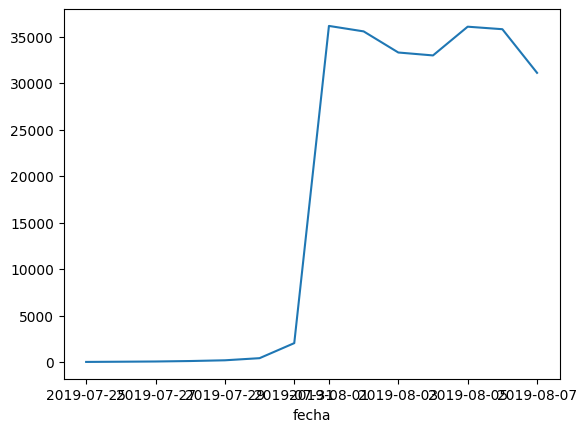

In [15]:
df_fecha=data.groupby('fecha')['id'].count()
df_fecha.plot()

<div class="alert alert-block alert-warning">
<b>Celda [15]</b> <a class="tocSkip"></a><br>
El gráfico de líneas que has creado muestra la cantidad de eventos por fecha. Para mejorar su interpretación, considera agregar un título y etiquetas a los ejes. Esto facilitará que otros comprendan rápidamente la información que el gráfico está presentando.
</div>


In [16]:
data_fil=data[data['fecha']>pd.to_datetime('2019-07-31').date()]
data_fil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240887 entries, 2828 to 244125
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   evento    240887 non-null  object        
 1   id        240887 non-null  int64         
 2   fecha_co  240887 non-null  datetime64[ns]
 3   grupo     240887 non-null  int64         
 4   fecha     240887 non-null  object        
 5   hora      240887 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 12.9+ MB


In [17]:
df_control_unido=data_fil[data_fil['grupo']!=248] 
df_control_unido.head(1)

,evento,id,fecha_co,grupo,fecha,hora
2828,Tutorial,3737462046622621720,2019-08-01 00:07:28,246,2019-08-01,00:07:28


In [18]:
df_gB=data_fil[data_fil['grupo']==248]
df_gB.head(1)

,evento,id,fecha_co,grupo,fecha,hora
2844,MainScreenAppear,4613461174774205834,2019-08-01 00:14:31,248,2019-08-01,00:14:31


In [19]:
#df_control_unido['grupo']='A'
#df_control_unido
df_control_unido.loc[:,'grupo']=249
df_control_unido.head(1)

/.venv/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,evento,id,fecha_co,grupo,fecha,hora
2828,Tutorial,3737462046622621720,2019-08-01 00:07:28,249,2019-08-01,00:07:28


In [20]:
df_control_unido.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156324 entries, 2828 to 244125
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   evento    156324 non-null  object        
 1   id        156324 non-null  int64         
 2   fecha_co  156324 non-null  datetime64[ns]
 3   grupo     156324 non-null  int64         
 4   fecha     156324 non-null  object        
 5   hora      156324 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 8.3+ MB


In [21]:
df_nuevo=pd.concat([df_control_unido, df_gB], axis=0)
df_nuevo.head(1)

,evento,id,fecha_co,grupo,fecha,hora
2828,Tutorial,3737462046622621720,2019-08-01 00:07:28,249,2019-08-01,00:07:28


<div class="alert alert-block alert-success">
<b>Celda [21]</b> <a class="tocSkip"></a><br>
Has concatenado correctamente los conjuntos de datos <code>df_control_unido</code> y <code>df_gB</code>. Esta acción es esencial para preparar los datos para análisis comparativos entre grupos.
</div>


In [22]:
data_fil['id'].nunique()/data['id'].nunique()

0.9977486425638988

De usuarios casi no se perdieron al filtrar los datos, porque los datos filtrados contienen el 99% de usuarios

In [23]:
data_fil.shape[0]/data.shape[0]

0.988404393692581

Los datos filtrados contienen el 98.8 % de eventos, es decir casi no se perdieron datos

In [24]:
datos_por_grupo=data_fil.groupby('grupo')['id'].nunique()
datos_por_grupo

grupo
246    2484
247    2513
248    2537
Name: id, dtype: int64

en el df filtrado si contiene usuarios de los tres grupos

Estudio de embudo de eventos

In [25]:
data_fil.groupby('evento')['id'].count().sort_values(ascending= False)

evento
MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: id, dtype: int64

In [26]:
eventosUsuario=data_fil.groupby('evento')['id'].nunique().sort_values(ascending= False)
eventosUsuario

evento
MainScreenAppear           7419
OffersScreenAppear         4593
CartScreenAppear           3734
PaymentScreenSuccessful    3539
Tutorial                    840
Name: id, dtype: int64

Embudo eventos:

MainScreen> OfferScreen> CartScreen> PaymentScreen

El tutorial se va a considerar como opcional y no se va a considerar como parte del embudo de marketing

In [27]:
eventosUsuario=data_fil.groupby('evento')['id'].nunique().sort_values(ascending= False)
eventosUsuario=eventosUsuario.reset_index()
eventosUsuario

,evento,id
0,MainScreenAppear,7419
1,OffersScreenAppear,4593
2,CartScreenAppear,3734
3,PaymentScreenSuccessful,3539
4,Tutorial,840


In [28]:
eventosUsuario['usuarioPA']=eventosUsuario['id'].shift()
eventosUsuario

,evento,id,usuarioPA
0,MainScreenAppear,7419,NaN
1,OffersScreenAppear,4593,7419.0
2,CartScreenAppear,3734,4593.0
3,PaymentScreenSuccessful,3539,3734.0
4,Tutorial,840,3539.0


In [29]:
eventosUsuario['tc_pa']=eventosUsuario['id']/eventosUsuario['usuarioPA']
eventosUsuario['t_abandono']=1-eventosUsuario['tc_pa']
eventosUsuario

,evento,id,usuarioPA,tc_pa,t_abandono
0,MainScreenAppear,7419,NaN,NaN,NaN
1,OffersScreenAppear,4593,7419.0,0.619086,0.380914
2,CartScreenAppear,3734,4593.0,0.812976,0.187024
3,PaymentScreenSuccessful,3539,3734.0,0.947777,0.052223
4,Tutorial,840,3539.0,0.237355,0.762645


<div class="alert alert-block alert-success">
<b>Celda [29]</b> <a class="tocSkip"></a><br>
Has calculado correctamente las tasas de conversión y abandono. Sería útil incluir una breve explicación de estos cálculos en el notebook para que el lector entienda su importancia en el contexto del análisis.
</div>


In [30]:
3539/74.19

47.70184661005526

-En el paso de MainScreen a OfferScreen es donde se pierden mas usuarios

-El porcentaje de usuarios que hacen el pago es 47.7%

Prueba de hipotesis A/A/B

Cuantos usuarios hay en cada grupo?

In [31]:
df_u_grupo=data_fil.groupby('grupo')['id'].nunique()
df_u_grupo

grupo
246    2484
247    2513
248    2537
Name: id, dtype: int64

In [32]:
df_conversion=data_fil[['id', 'grupo']].drop_duplicates()
df_conversion.head(3)

,id,grupo
2828,3737462046622621720,246
2832,1433840883824088890,247
2833,4899590676214355127,247


In [33]:
usuario_fil=data_fil[data_fil['evento']=='PaymentScreenSuccessful']['id'].unique()
usuario_fil

array([4613461174774205834, 2712290788139738557, 6049698452889664846, ...,
       1309234519709630135, 7823752606740475984, 4164287718073415198])

In [34]:
usuario_prueba=data_fil[data_fil['evento']=='PaymentScreenSuccessful']
user_ev=usuario_prueba.groupby('grupo')['id'].nunique()
print('usuarios por grupo:\n', user_ev)

usuarios por grupo:
 grupo
246    1200
247    1158
248    1181
Name: id, dtype: int64


In [35]:
convertidos=pd.DataFrame(data={'id':usuario_fil,
                              'convertido':1})

In [36]:
convertidos.head(2)

,id,convertido
0,4613461174774205834,1
1,2712290788139738557,1


In [37]:
df_pago=df_conversion.merge(convertidos, on='id', how='left')
df_pago['convertido']=df_pago['convertido'].fillna(0)
df_pago.head()

,id,grupo,convertido
0,3737462046622621720,246,1.0
1,1433840883824088890,247,0.0
2,4899590676214355127,247,1.0
3,1182179323890311443,246,0.0
4,4613461174774205834,248,1.0


In [38]:
grupo246=df_pago.query("grupo==246")['convertido']
grupo247=df_pago.query("grupo==247")['convertido']


H0: la taza de conversion promedio entre los grupos son iguales.
HA: la  taza de conversion promedio entre los grupos son diferentes 

In [39]:
alpha=.05
resultado=st.ttest_ind(grupo246, grupo247)
print('valorp:', resultado.pvalue)
if resultado.pvalue < alpha:
    print('Rechazamos H0')
else:
    print('No rechazamos H0')

valorp: 0.11461233163248476
No rechazamos H0


<div class="alert alert-block alert-success">
<b>Celda [39]</b> <a class="tocSkip"></a><br>
El test de hipótesis que has realizado es adecuado para comparar las tasas de conversión entre grupos. Sin embargo, es importante verificar los supuestos del test t, como la normalidad y la homogeneidad de varianzas, para asegurar que los resultados sean válidos.
</div>


El evento mas popular es el de MainScreenAppear

In [40]:
evento_popular=data_fil.query("evento=='MainScreenAppear'")
ep_grupo=evento_popular.groupby('grupo')['id'].nunique()
ep_grupo

grupo
246    2450
247    2476
248    2493
Name: id, dtype: int64

In [41]:
ep_grupo.loc[246]/datos_por_grupo.loc[246]

0.9863123993558777

In [42]:
ep_grupo.loc[247]/datos_por_grupo.loc[247]

0.9852765618782332

In [43]:
def funcion (data_fil, evento, A, B):
    usuario_prueba=data_fil[data_fil['evento']==evento]
    user_ev=usuario_prueba.groupby('grupo')['id'].nunique()
    print('usuarios por grupo para el evento:\n', evento,'\n', user_ev)
    df_u_grupo=data_fil.groupby('grupo')['id'].nunique()
    df_conversion=data_fil[['id', 'grupo']].drop_duplicates()
    usuario_fil=data_fil[data_fil['evento']==evento]['id'].unique()
    convertidos=pd.DataFrame(data={'id':usuario_fil, 'convertido':1})
    df_pago=df_conversion.merge(convertidos, on='id', how='left')
    df_pago['convertido']=df_pago['convertido'].fillna(0)
    grupoA=df_pago.query("grupo==@A")['convertido']
    grupoB=df_pago.query("grupo==@B")['convertido']
    
    alpha=.05
    resultado=st.ttest_ind(grupoA, grupoB)
    print('valorp:', resultado.pvalue)
    if resultado.pvalue < alpha:
        print('Rechazamos H0')
    else:
        print('No rechazamos H0, la tasa de conversion entre los grupos son iguales ')

<div class="alert alert-block alert-success">
<b>Celda [43]</b> <a class="tocSkip"></a><br>
La función que has creado para realizar pruebas de hipótesis es excelente para automatizar el proceso y asegurar la consistencia en el análisis. Esto demuestra un buen nivel de comprensión y aplicación de funciones en Python.
</div>


In [44]:
funcion(data_fil, 'MainScreenAppear', 246, 247)

usuarios por grupo para el evento:
 MainScreenAppear 
 grupo
246    2450
247    2476
248    2493
Name: id, dtype: int64
valorp: 0.7571174621103072
No rechazamos H0, la tasa de conversion entre los grupos son iguales 


In [45]:
funcion(data_fil, 'OffersScreenAppear', 246, 247)

usuarios por grupo para el evento:
 OffersScreenAppear 
 grupo
246    1542
247    1520
248    1531
Name: id, dtype: int64
valorp: 0.24818223444867904
No rechazamos H0, la tasa de conversion entre los grupos son iguales 


In [46]:
funcion(data_fil, 'CartScreenAppear', 246, 247)

usuarios por grupo para el evento:
 CartScreenAppear 
 grupo
246    1266
247    1238
248    1230
Name: id, dtype: int64
valorp: 0.22891646330485427
No rechazamos H0, la tasa de conversion entre los grupos son iguales 


In [47]:
funcion(data_fil, 'PaymentScreenSuccessful', 246, 247)

usuarios por grupo para el evento:
 PaymentScreenSuccessful 
 grupo
246    1200
247    1158
248    1181
Name: id, dtype: int64
valorp: 0.11461233163248476
No rechazamos H0, la tasa de conversion entre los grupos son iguales 


In [48]:
def funcion_b (data_fil, evento, A, B):
    df_u_grupo=data_fil.groupby('grupo')['id'].nunique()
    df_conversion=data_fil[['id', 'grupo']].drop_duplicates()
    usuario_fil=data_fil[data_fil['evento']==evento]['id'].unique()
    convertidos=pd.DataFrame(data={'id':usuario_fil, 'convertido':1})
    df_pago=df_conversion.merge(convertidos, on='id', how='left')
    df_pago['convertido']=df_pago['convertido'].fillna(0)
    grupoA=df_pago.query("grupo==@A")['convertido']
    grupoB=df_pago.query("grupo==@B")['convertido']
    
    alpha=.05
    resultado=st.ttest_ind(grupoA, grupoB)
    print('valorp:', resultado.pvalue)
    if resultado.pvalue < alpha:
        print('Rechazamos H0')
    else:
        print('No rechazamos H0, la tasa de conversion entre los grupos son iguales ')

In [49]:
funcion_b(data_fil, 'MainScreenAppear', 246, 248)

valorp: 0.29506606465679136
No rechazamos H0, la tasa de conversion entre los grupos son iguales 


In [50]:
funcion_b(data_fil, 'OffersScreenAppear', 246, 248)

valorp: 0.20843948636199391
No rechazamos H0, la tasa de conversion entre los grupos son iguales 


In [51]:
funcion_b(data_fil, 'CartScreenAppear', 246, 248)

valorp: 0.07845751752267907
No rechazamos H0, la tasa de conversion entre los grupos son iguales 


In [52]:
funcion_b(data_fil, 'PaymentScreenSuccessful', 246, 248)

valorp: 0.2123337471133262
No rechazamos H0, la tasa de conversion entre los grupos son iguales 


In [53]:
funcion_b(data_fil, 'MainScreenAppear', 247, 248)

valorp: 0.45880437959723175
No rechazamos H0, la tasa de conversion entre los grupos son iguales 


In [54]:
funcion_b(data_fil, 'OffersScreenAppear', 247, 248)

valorp: 0.9198015341631126
No rechazamos H0, la tasa de conversion entre los grupos son iguales 


In [55]:
funcion_b(data_fil, 'CartScreenAppear', 247, 248)

valorp: 0.5787080147829398
No rechazamos H0, la tasa de conversion entre los grupos son iguales 


In [56]:
funcion_b(data_fil, 'PaymentScreenSuccessful', 247, 248)

valorp: 0.7374027184332623
No rechazamos H0, la tasa de conversion entre los grupos son iguales 


Comparar el grupo B con los dos grupos control combinados:

In [57]:
funcion_b(df_nuevo, 'MainScreenAppear', 249, 248)

valorp: 0.29430776026592703
No rechazamos H0, la tasa de conversion entre los grupos son iguales 


<div class="alert alert-block alert-success">
<b>Celda [57]</b> <a class="tocSkip"></a><br>
Al aplicar la función <code>funcion_b</code> a diferentes eventos y grupos, asegúrate de interpretar correctamente los resultados en el contexto del problema que estás analizando. Esto te ayudará a proporcionar conclusiones más sólidas y accionables.
</div>


In [58]:
funcion_b(df_nuevo, 'OffersScreenAppear', 249, 248)

valorp: 0.4343224300849128
No rechazamos H0, la tasa de conversion entre los grupos son iguales 


In [59]:
funcion_b(df_nuevo, 'CartScreenAppear', 249, 248)

valorp: 0.18180539347221455
No rechazamos H0, la tasa de conversion entre los grupos son iguales 


In [60]:
funcion_b(df_nuevo, 'PaymentScreenSuccessful', 249, 248)

valorp: 0.600486568376488
No rechazamos H0, la tasa de conversion entre los grupos son iguales 


Al comparar el grupo B con los grupos control combinados se obtuvieron los mismos resultados que cuando se comparo el grupo B con cada grupo control.

Se han realizado 16 pruebas de hipotesis.
Se uso un nivel de significancia de 0.05, para tener solo un error por cada 20 resultados.

CONCLUSION GENERAL:

No hubo diferencia estadisticamente significativa entre el grupo B y los grupos control, es decir los cambios implementados en la aplicaion no tuvieron efecto en los usuarios.

<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Muy buen trabajo, Lucero! A lo largo del proyecto mostraste fortalezas muy claras:<br><br>
• Usaste <code>info()</code> para obtener una visión general de los datos.<br>
• Eliminaste duplicados de manera efectiva, aunque se recomienda documentarlo.<br>
• Convertiste correctamente las fechas para un análisis coherente.<br>
• Creaste gráficos que ayudan a visualizar tendencias en los datos.<br>
• Modificaste y concatenaste conjuntos de datos para análisis comparativos.<br>
• Calculaste tasas de conversión y abandono, mostrando un buen entendimiento de los datos.<br>
• Realizaste pruebas de hipótesis adecuadas para comparar grupos.<br>
• Creaste funciones para automatizar y estandarizar el análisis.<br>
• Aplicaste un enfoque estructurado para el análisis de eventos.<br>
• Mantuviste un flujo de trabajo claro y lógico a lo largo del proyecto.<br><br>
¡Felicidades!
</div>
